# Breast Cancer Wisconsin (Diagnostic)

## Background

This work grew out of the desire by Dr. Wolberg to accurately diagnose breast masses based solely on a Fine Needle Aspiration (FNA). A classifier was constructed using the multisurface method (MSM) of pattern separation on these nine features that successfully diagnosed 97% of new cases. The resulting data set is well-known as **the Wisconsin Breast Cancer Data.**

## Data Overview
### Instances
Number of instances: 569
### Features
1. **radius**: Mean of distances from center to points on the perimeter.

2. **texture**: Standard deviation of gray-scale values.

3. **perimeter**: Total boundary length around the nucleus.

4. **area**: Size of the nucleus measured `in pixels`.

5. **smoothness**: How smooth the edges are; lower means more irregular.

6. **compactness**: Shape complexity, derived from perimeter and area. `(perimeter^2 / area - 1.0)`

7. **concavity**: Depth/severity of inward curves along the nucleus boundary.

8. **concave points**: Count of inward indents along the edge.

9. **symmetry**: How evenly shaped the nucleus is on both sides.

10. **fractal dimension**: Measure of roughness/irregularity of the boundary. `("coastline approximation" - 1)`

### Values (for each feature); resulting in 30 feature

The mean, standard error (SE), and worst (largest)

## Resources:
### Source: 
[https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic] (UCI)

### See also:
http://www.cs.wisc.edu/~olvi/uwmp/mpml.html<br>
http://www.cs.wisc.edu/~olvi/uwmp/cancer.html



# Analysis and EDA

## Importing Libraries and Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('wdbc.data')

In [3]:
columns = [
    'id', 'diagnosis',
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

df = pd.read_csv("wdbc.data", header=None, names=columns)
df.drop(columns=["id"], inplace=True)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})


## Data Inspection

In [4]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.shape

(569, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Statistical overview

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave_points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


## Data Cleaning

In [8]:
df.isna().sum().sum()

np.int64(0)

In [9]:
df.duplicated().sum()

np.int64(0)

    No missing or duplicated values

## EDA

Count of Malignant/Benign diagnosis

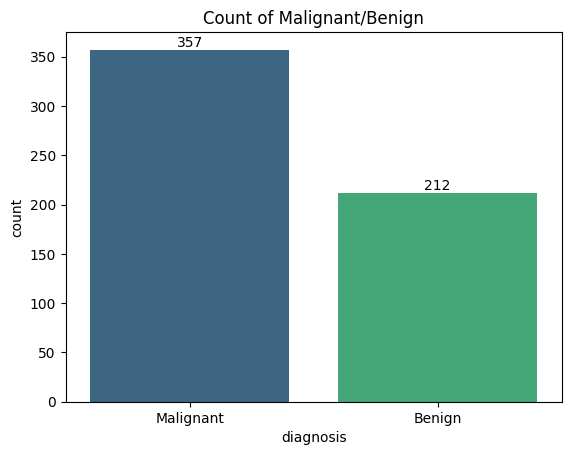

In [10]:
ax = sns.countplot(df, x='diagnosis', palette='viridis')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Count of Malignant/Benign')
ax.set_xticklabels(['Malignant', 'Benign'])
plt.show()

Distribution of features

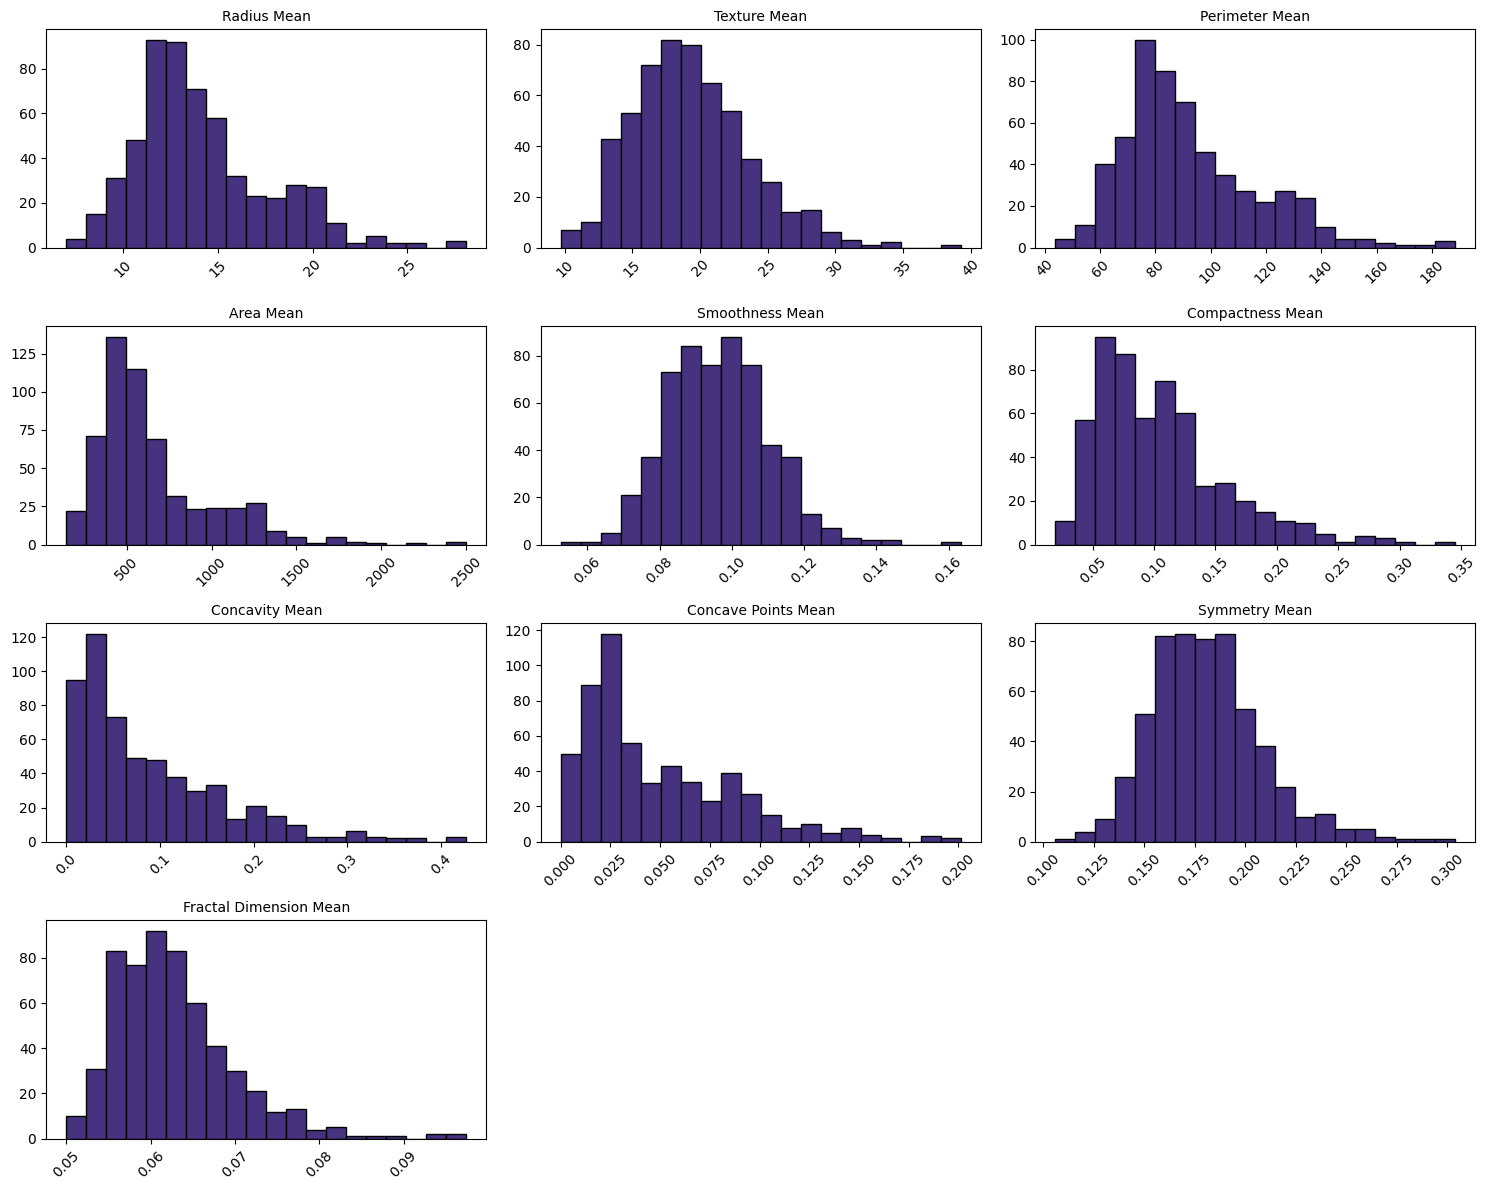

In [11]:
mean_features = [col for col in df.columns if col.endswith('_mean')]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12),)
axes = axes.flatten()

for i, feature in enumerate(mean_features):
    axes[i].hist(df[feature], bins=20, color=sns.color_palette('viridis')[0], edgecolor='black')
    axes[i].set_title(feature.replace('_', ' ').title(), fontsize=10)
    axes[i].tick_params(axis='x', labelrotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

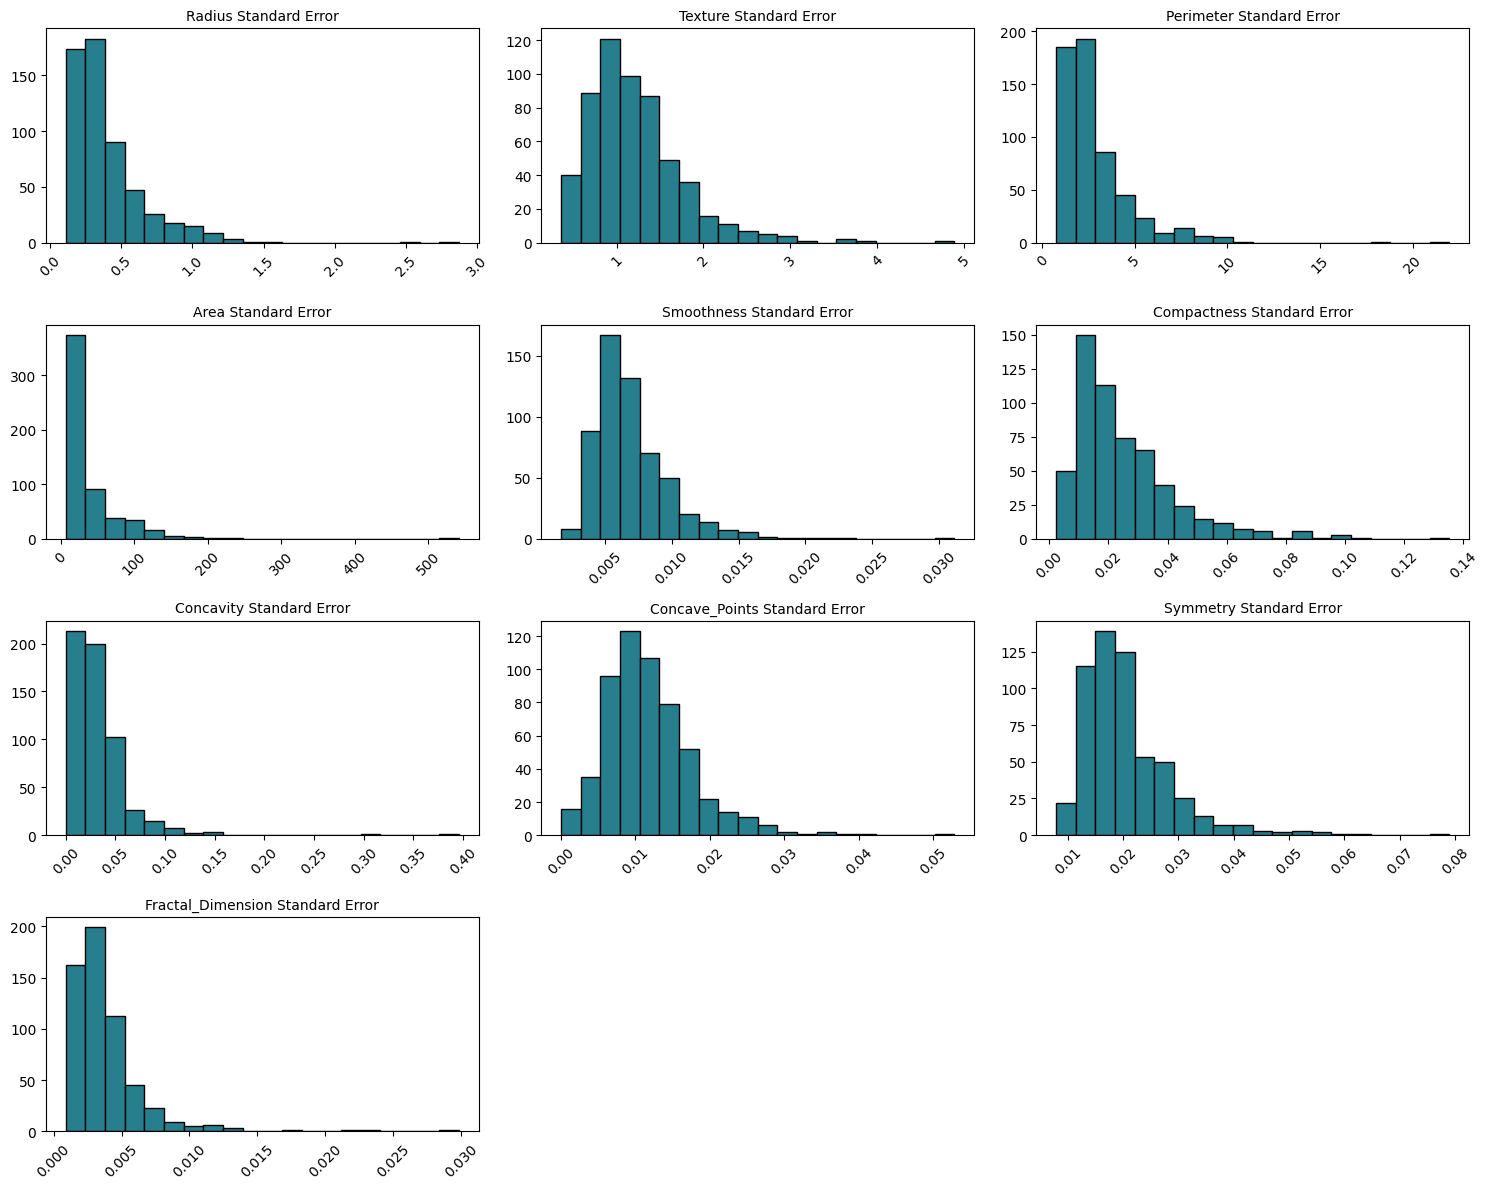

In [12]:
se_features = [col for col in df.columns if col.endswith('_se')]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, feature in enumerate(se_features):
    axes[i].hist(df[feature], bins=20, color=sns.color_palette('viridis')[2], edgecolor='black')
    axes[i].set_title(feature.replace('_se', ' Standard Error').title(), fontsize=10)
    axes[i].tick_params(axis='x', labelrotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

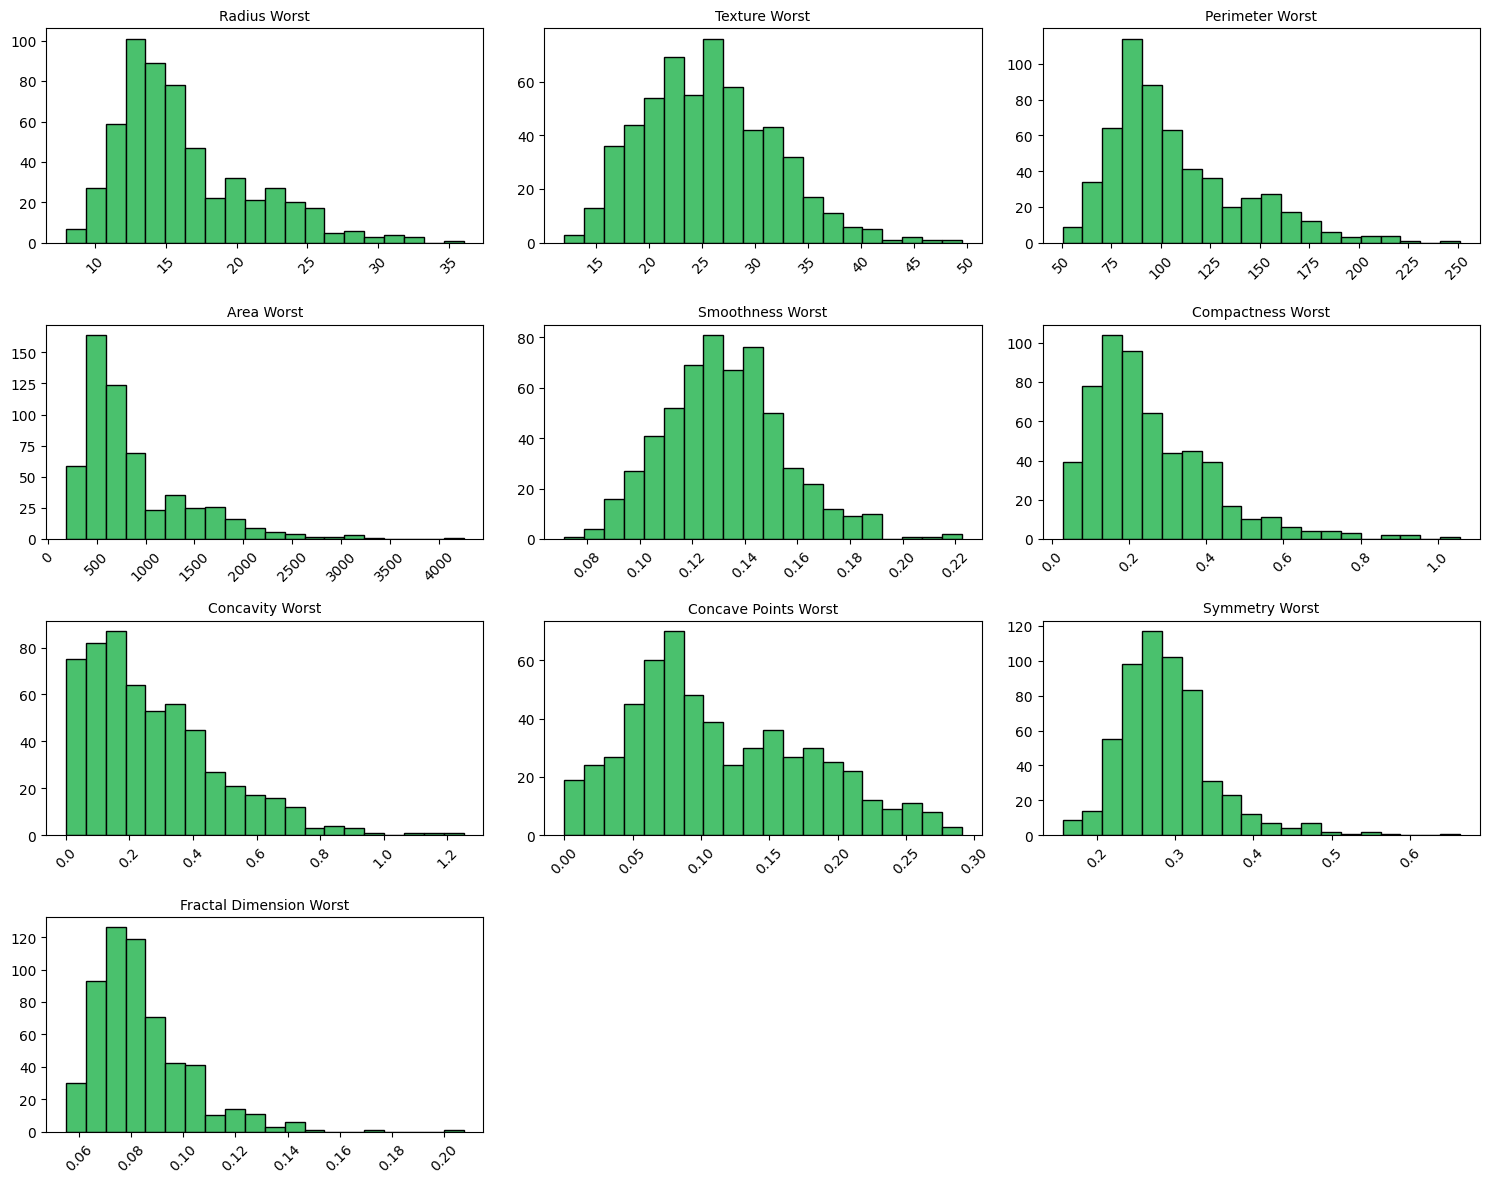

In [13]:
worst_features = [col for col in df.columns if col.endswith('_worst')]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, feature in enumerate(worst_features):
    axes[i].hist(df[feature], bins=20, color=sns.color_palette('viridis')[4], edgecolor='black')
    axes[i].set_title(feature.replace('_', ' ').title(), fontsize=10)
    axes[i].tick_params(axis='x', labelrotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

Correlation

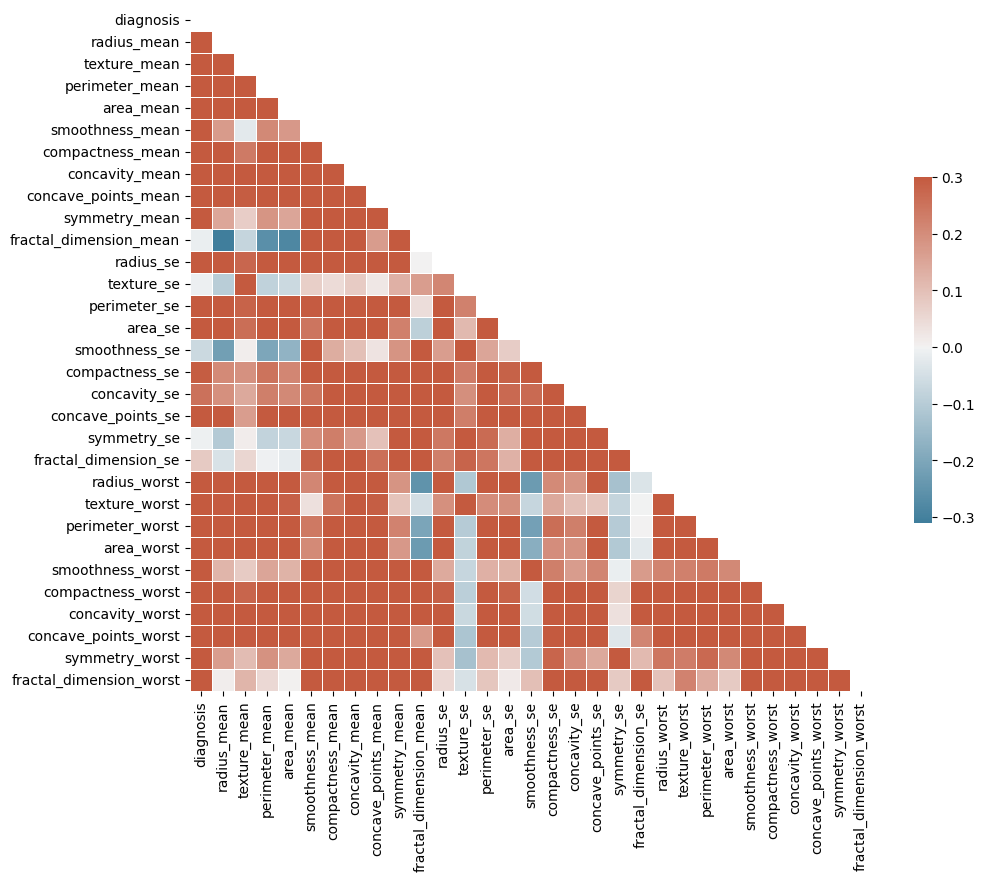

In [14]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

# Normality Test



### **Normality Test Comparison Table**
| Test                | Sensitivity | Best For                  | Handles Estimated Parameters? | Q-Q Plot Interpretation Guide      | Key Limitations |
|---------------------|-------------|---------------------------|-------------------------------|------------------------------------|----------------|
| **Shapiro-Wilk**    | High        | Small samples (n < 50)    |  No                         | Not applicable (test-only)         | Over-sensitive for n > 50 |
| **Anderson-Darling**| Very High   | Tail deviations           |  Yes                        | Points deviate at ends → Reject normality | Critical values depend on distribution |
| **KS Test**         | Moderate    | Any distribution          |  Yes                        | Curved patterns → Non-normal       | Low power for normality specifically |
| **Q-Q Plot**        | Visual      | All sample sizes          |  Yes                        | Points on diagonal line → Normal   | Subjective interpretation |




### Q-Q Plot

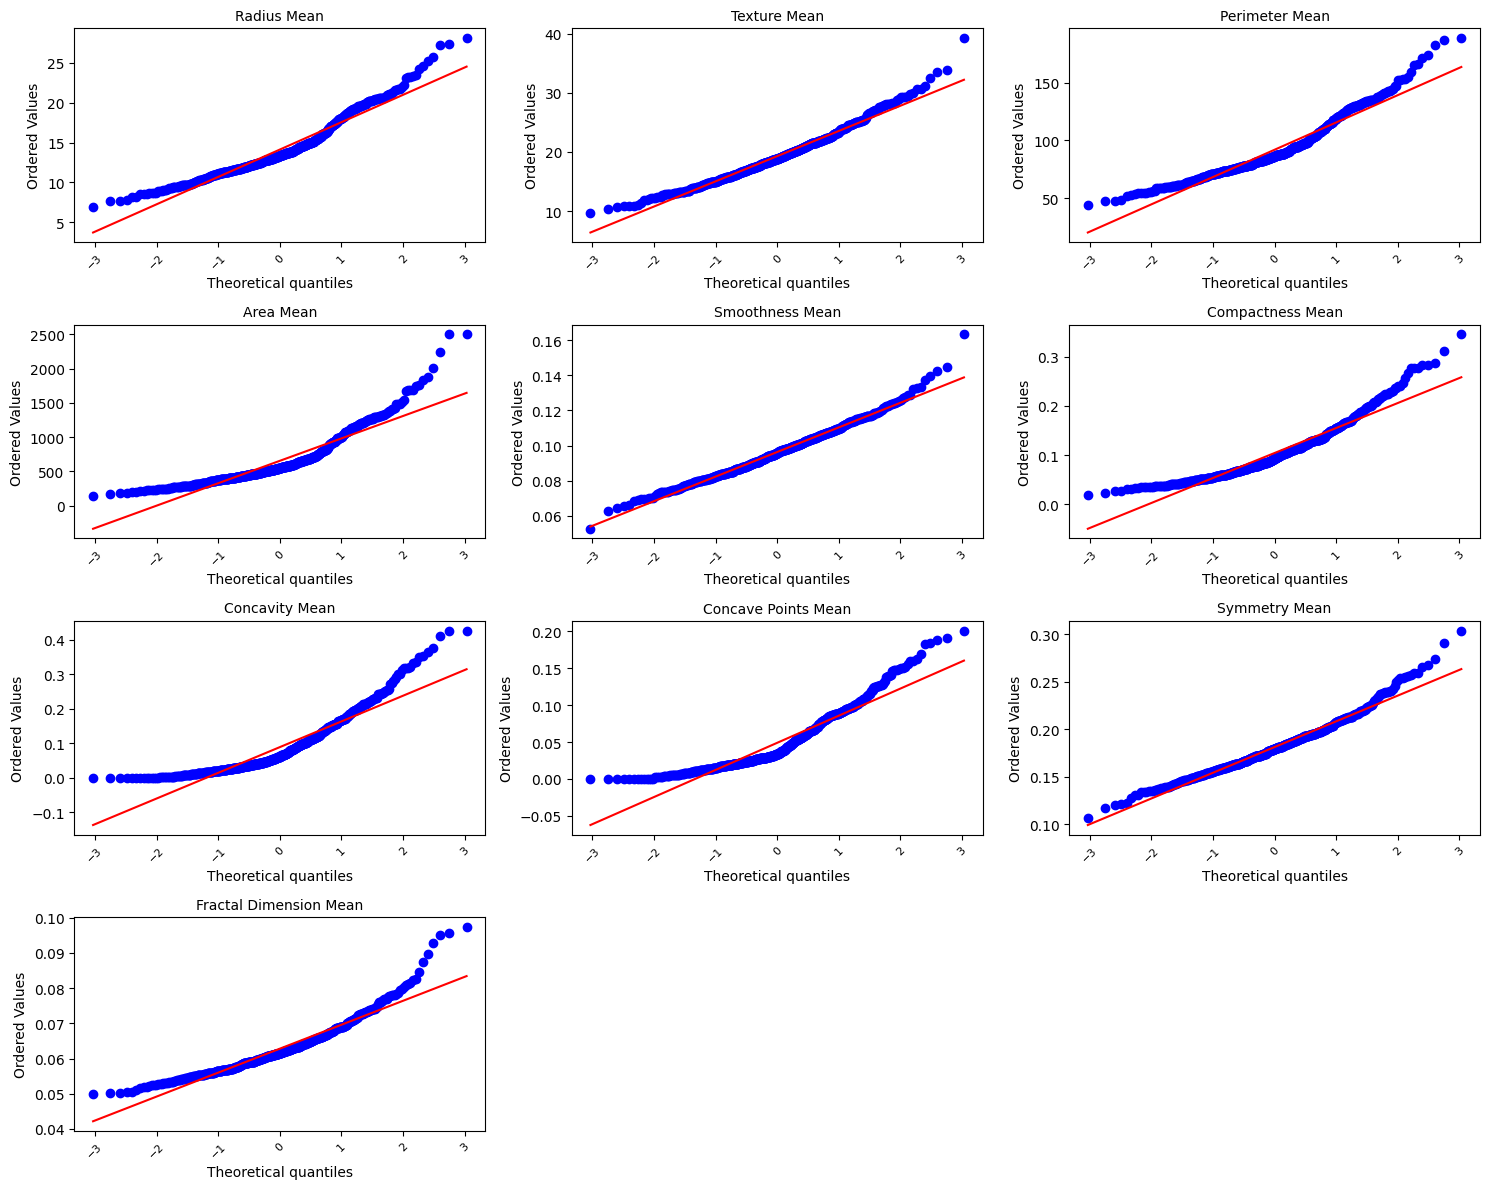

In [15]:
from scipy import stats

mean_features = [col for col in df.columns if col.endswith('_mean')]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axes = axes.flatten()  

for i, feature in enumerate(mean_features):
    stats.probplot(df[feature], plot=axes[i])
    axes[i].set_title(f'{feature.replace("_", " ").title()}', fontsize=10)
    axes[i].tick_params(axis='x', labelsize=8, rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

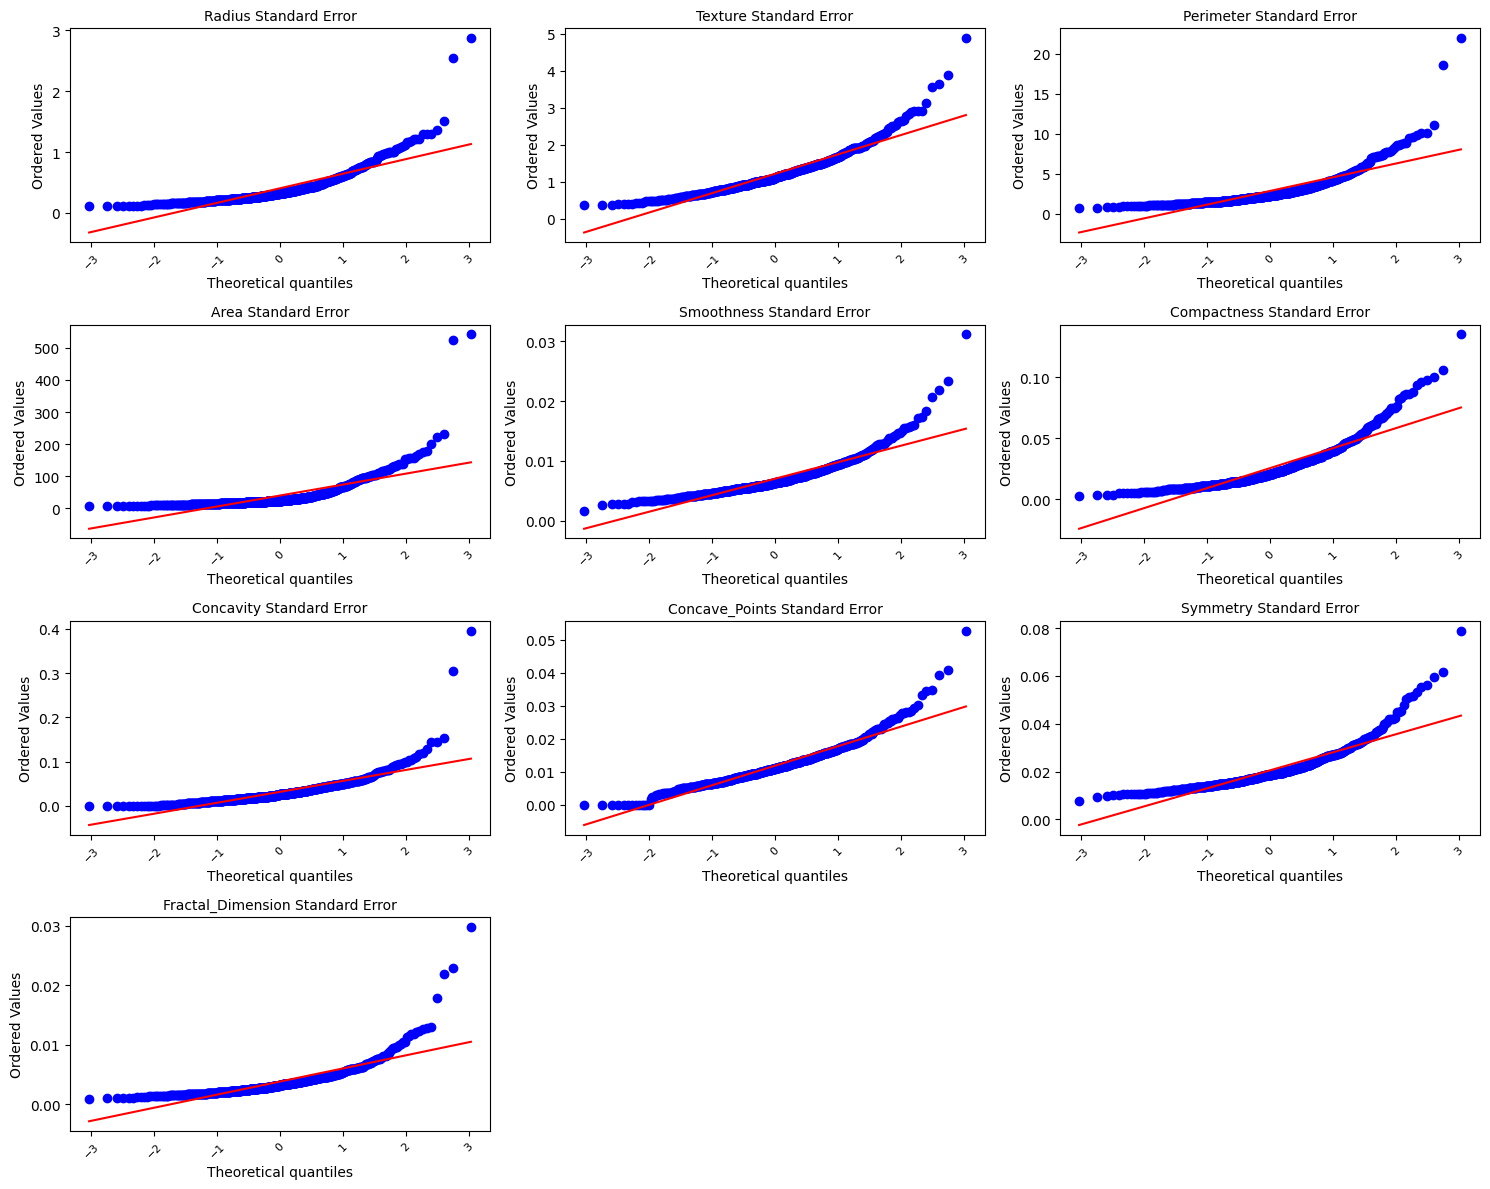

In [16]:
se_features = [col for col in df.columns if col.endswith('_se')]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, feature in enumerate(se_features):
    stats.probplot(df[feature], plot=axes[i])
    axes[i].set_title(f'{feature.replace("_se", " Standard Error").title()}', fontsize=10)
    axes[i].tick_params(axis='x', labelsize=8, rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

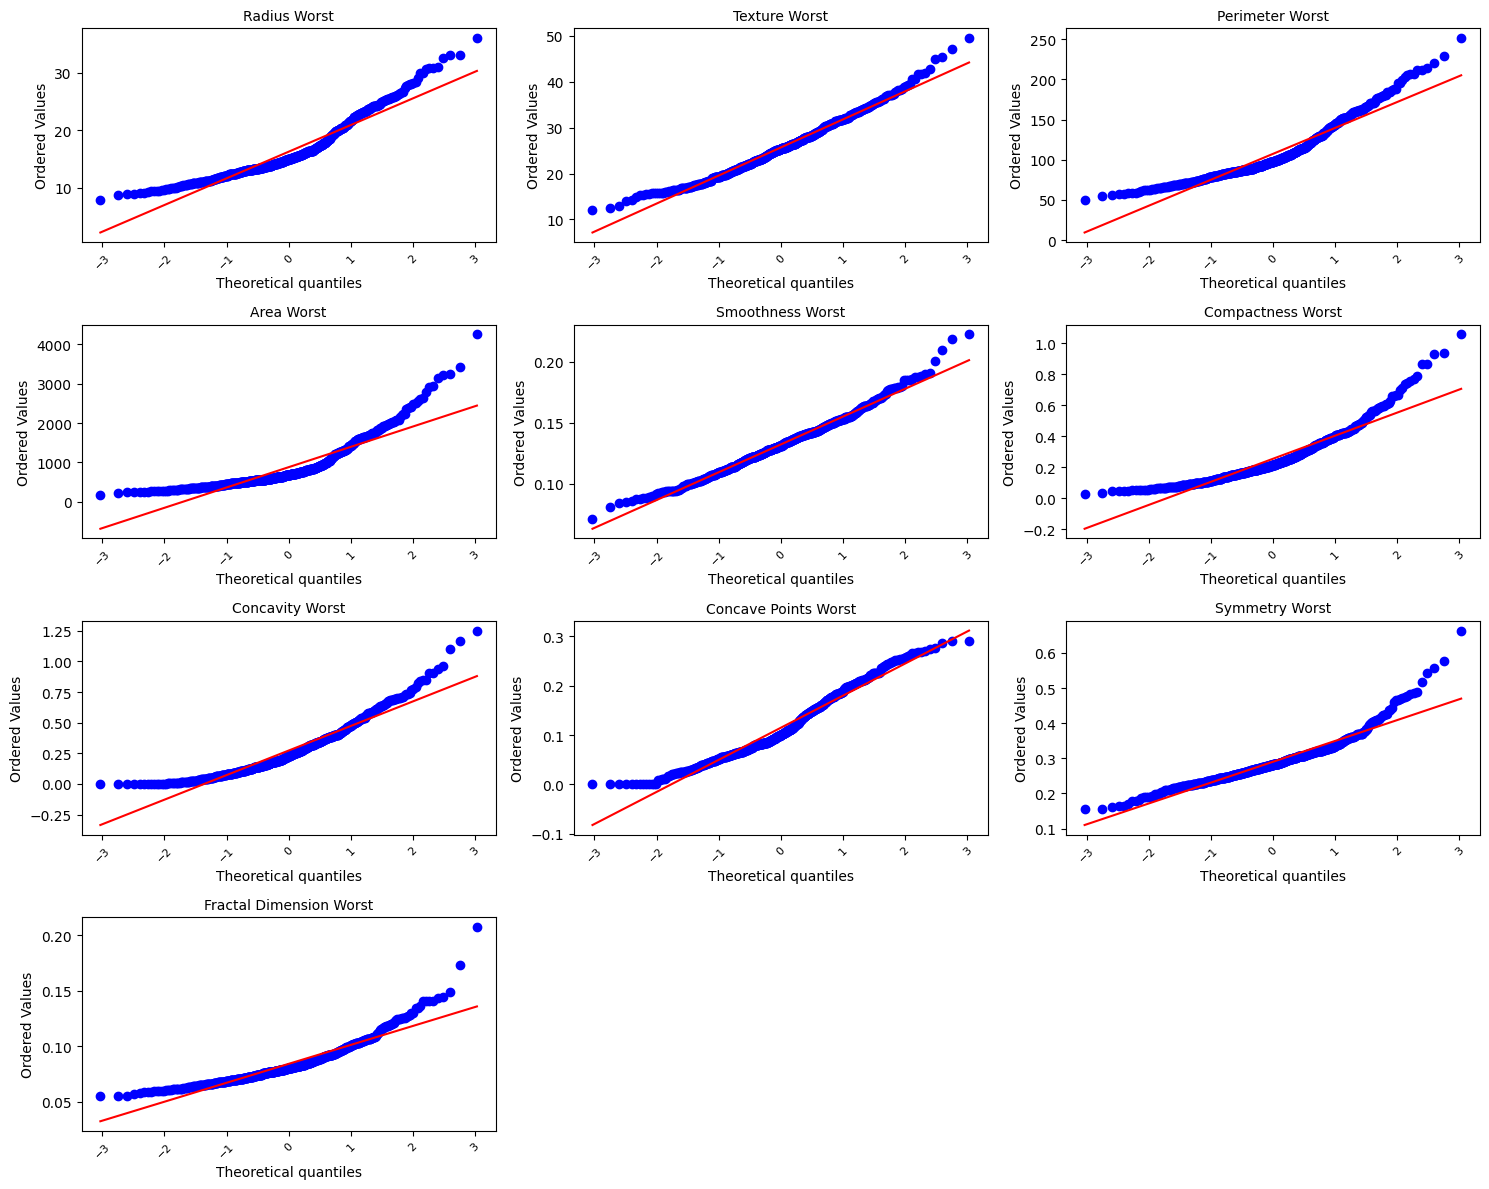

In [17]:
worst_features = [col for col in df.columns if col.endswith('_worst')]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, feature in enumerate(worst_features):
    stats.probplot(df[feature], plot=axes[i])
    axes[i].set_title(f'{feature.replace("_", " ").title()}', fontsize=10)
    axes[i].tick_params(axis='x', labelsize=8, rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Shapiro

In [18]:
from scipy.stats import shapiro

normality_results = []

for col in df.columns[1:]:
    stat, p = shapiro(df[col])
    normality_results.append({
        "Feature": col,
        "Shapiro p-value": p,
        "Normally Distributed": p > 0.05
    })

normal_df = pd.DataFrame(normality_results)
normal_df.sort_values(by="Normally Distributed", ascending=False)

,Feature,Shapiro p-value,Normally Distributed
0,radius_mean,3.105644e-14,False
1,texture_mean,7.283581e-08,False
28,symmetry_worst,3.233784e-17,False
27,concave_points_worst,1.984879e-10,False
26,concavity_worst,4.543300e-17,False
25,compactness_worst,1.247461e-19,False
24,smoothness_worst,2.096993e-04,False
23,area_worst,5.595364e-25,False
22,perimeter_worst,1.373336e-17,False
21,texture_worst,2.564467e-06,False


    Was "Shapiro's test" inaccurate? Shpairo's test works well with small samples (smaller than 50), in this case it's not the best fit for our data.

### KS

In [19]:
from scipy.stats import kstest

def ks_normality_test(feature_data):
    """Perform KS test against normal distribution with MLE parameters."""
    mean, std = feature_data.mean(), feature_data.std()
    ks_stat, p_value = kstest(feature_data, 'norm', args=(mean, std))
    return ks_stat, p_value

ks_results = pd.DataFrame({
    'Feature': df.columns,
    'KS_Statistic': [ks_normality_test(df[col])[0] for col in df.columns],
    'KS_p_value': [ks_normality_test(df[col])[1] for col in df.columns],
    'Is_Normal_KS': [ks_normality_test(df[col])[1] > 0.05 for col in df.columns]
})

ks_results.sort_values(by='KS_p_value', ascending=False, inplace=True)
ks_results.reset_index(drop=True, inplace=True)

ks_results

,Feature,KS_Statistic,KS_p_value,Is_Normal_KS
0,smoothness_worst,0.035470,4.607808e-01,True
1,smoothness_mean,0.035967,4.430402e-01,True
2,texture_worst,0.040909,2.889043e-01,True
3,texture_mean,0.049075,1.248076e-01,True
4,symmetry_mean,0.051685,9.236217e-02,True
5,concave_points_se,0.080061,1.278366e-03,False
6,texture_se,0.088957,2.284673e-04,False
7,symmetry_worst,0.090001,1.844662e-04,False
8,fractal_dimension_mean,0.094753,6.747055e-05,False
9,concave_points_worst,0.095819,5.346005e-05,False


### Anderson

In [20]:
from scipy.stats import anderson

def is_normal_ad(feature_data, significance_level=10):
    """Check if a feature passes Anderson-Darling test for normality at given significance level."""
    result = anderson(feature_data)
    sl_idx = np.where(result.significance_level == significance_level)[0][0]
    critical_value = result.critical_values[sl_idx]
    return result.statistic < critical_value

normality_results = pd.DataFrame({
    'Feature': df.columns,
    'AD_Statistic': [anderson(df[col]).statistic for col in df.columns],
    'AD_10%_Critical': [anderson(df[col]).critical_values[1] for col in df.columns],  # Index 1 = 10% level
    'Is_Normal_10%': [is_normal_ad(df[col], significance_level=10) for col in df.columns]
})

TOLERANT_THRESHOLD = 1.5
normality_results['Is_Almost_Normal'] = normality_results['AD_Statistic'] < TOLERANT_THRESHOLD

normality_results.sort_values(by='Is_Almost_Normal', ascending=False, inplace=True)
normality_results.reset_index(drop=True, inplace=True)

normality_results


,Feature,AD_Statistic,AD_10%_Critical,Is_Normal_10%,Is_Almost_Normal
0,smoothness_mean,0.982252,0.651,False,True
1,smoothness_worst,0.874443,0.651,False,True
2,diagnosis,110.948967,0.651,False,False
3,compactness_se,22.780344,0.651,False,False
4,symmetry_worst,9.114391,0.651,False,False
5,concave_points_worst,6.666825,0.651,False,False
6,concavity_worst,11.028140,0.651,False,False
7,compactness_worst,14.325777,0.651,False,False
8,area_worst,32.114935,0.651,False,False
9,perimeter_worst,15.995233,0.651,False,False


# Final Observation:


Most Normal: `Smoothness Mean`, `Smoothness Worst`

Moderately Normal: `Texture Mean`, `Symmetry Mean`




"Close enough" normality, can often be treated as normal for practical purposes (e.g., parametric tests).


# Modeling

In [51]:
X = df.drop(columns="diagnosis", axis=1)
y = df['diagnosis']

In [52]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), LogisticRegression(penalty="l2"))


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [54]:
clf.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [55]:
y_pred = clf.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.2f}")

Accuracy : 0.97


In [60]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[70  1]
 [ 2 41]]
